In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')


In [2]:
a=pd.read_csv('./datasets/구리금환율천연가스.csv',encoding='euc-kr',index_col='Date')
b=pd.read_csv('./datasets/은,채권,금리,변동성.csv',index_col='Date')
b.drop(['Open','High','Low','Close','Adj Close','Volume'],axis=1,inplace=True)

In [3]:
a=a.merge(b,left_index=True,right_index=True,how='left')
a=a.fillna(method='bfill')                                       ## 전에걸로 채움
a.dropna(axis=0,inplace=True)                                    ## 처음에 못채우는 결측치 1개 삭제

## Granger
    - Granger 인과검정의 영가설은 X가 Y에 영향을 미치지 않는다 이다. 즉 H0를 기각해야한다(p-value < alpha)

In [13]:
from statsmodels.tsa.stattools import grangercausalitytests
#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

#df.replace(',', '', regex=True, inplace=True) 
a = a.apply(pd.to_numeric, errors='coerce') # numeric 변환
maxlag= 14
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=True):    

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            # if verbose:print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            min_p_value_index = np.argmin(p_values)
            df.loc[r, c] = min_p_value
            print(r,c)
            print(f'Minimum P-value Index: {min_p_value_index} (Lag: {min_p_value_index + 1})')
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
df=grangers_causation_matrix(a, variables = a.columns)
df

Adj Close Adj Close
Minimum P-value Index: 0 (Lag: 1)
Volume Adj Close
Minimum P-value Index: 0 (Lag: 1)
구리 Adj Close
Minimum P-value Index: 0 (Lag: 1)
천연가스 Adj Close
Minimum P-value Index: 1 (Lag: 2)
원/달러 Adj Close
Minimum P-value Index: 6 (Lag: 7)
금 Adj Close
Minimum P-value Index: 11 (Lag: 12)
은 Adj Close
Minimum P-value Index: 12 (Lag: 13)
10년 채권 Adj Close
Minimum P-value Index: 0 (Lag: 1)
CD91일 Adj Close
Minimum P-value Index: 0 (Lag: 1)
콜 금리 Adj Close
Minimum P-value Index: 8 (Lag: 9)
국고채 3년 Adj Close
Minimum P-value Index: 7 (Lag: 8)
회사채 3년 Adj Close
Minimum P-value Index: 6 (Lag: 7)
vkospi Adj Close
Minimum P-value Index: 0 (Lag: 1)
Adj Close Volume
Minimum P-value Index: 0 (Lag: 1)
Volume Volume
Minimum P-value Index: 0 (Lag: 1)
구리 Volume
Minimum P-value Index: 0 (Lag: 1)
천연가스 Volume
Minimum P-value Index: 10 (Lag: 11)
원/달러 Volume
Minimum P-value Index: 1 (Lag: 2)
금 Volume
Minimum P-value Index: 1 (Lag: 2)
은 Volume
Minimum P-value Index: 1 (Lag: 2)
10년 채권 Volume
Minimum P-valu

,Adj Close_x,Volume_x,구리_x,천연가스_x,원/달러_x,금_x,은_x,10년 채권_x,CD91일_x,콜 금리_x,국고채 3년_x,회사채 3년_x,vkospi_x
Adj Close_y,1.0000,0.0657,0.0000,0.0104,0.0000,0.0000,0.0000,0.0107,0.0001,0.0024,0.0000,0.0000,0.0020
Volume_y,0.0000,1.0000,0.0001,0.0001,0.0000,0.1470,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
구리_y,0.0616,0.3025,1.0000,0.0060,0.0005,0.0000,0.0733,0.5593,0.1276,0.0655,0.0105,0.0010,0.0643
천연가스_y,0.0042,0.5432,0.4731,1.0000,0.0243,0.4107,0.2699,0.1063,0.3890,0.0384,0.0266,0.0305,0.1454
원/달러_y,0.0000,0.3000,0.0000,0.0043,1.0000,0.0000,0.0007,0.0000,0.0011,0.0000,0.0000,0.0000,0.2795
금_y,0.0007,0.2317,0.2090,0.6036,0.0000,1.0000,0.0026,0.0014,0.1050,0.0008,0.0941,0.0369,0.3094
은_y,0.0005,0.1601,0.0538,0.1731,0.0010,0.0000,1.0000,0.6717,0.4755,0.3249,0.2043,0.4022,0.0401
10년 채권_y,0.1049,0.3879,0.0021,0.0001,0.0218,0.1158,0.2988,1.0000,0.0024,0.0046,0.0000,0.0000,0.7719
CD91일_y,0.0000,0.0167,0.0000,0.0000,0.0000,0.0010,0.0324,0.0000,1.0000,0.0000,0.0000,0.0000,0.0048
콜 금리_y,0.0000,0.0259,0.0008,0.0000,0.0000,0.0000,0.2930,0.0031,0.0000,1.0000,0.0000,0.0000,0.0016


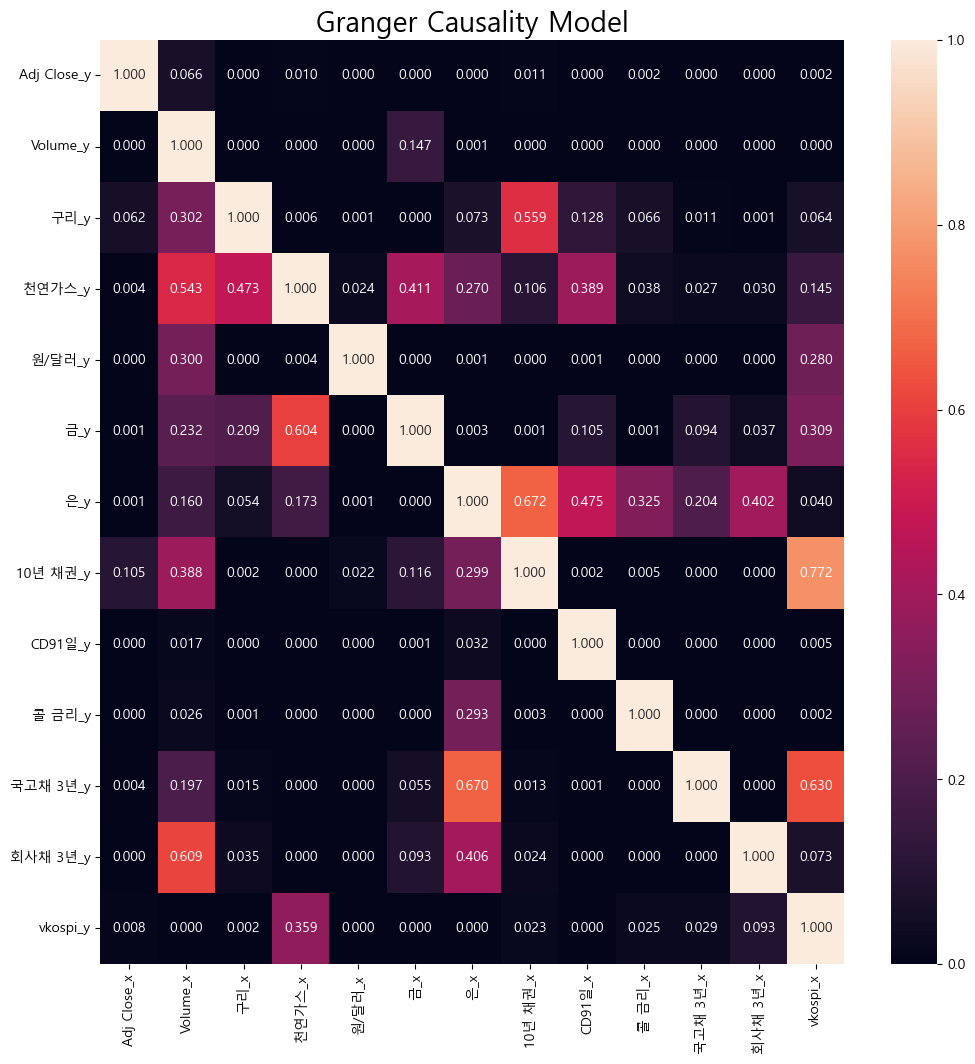

In [14]:
fig,ax= plt.subplots(1,1,figsize=(12,12),sharey=True)

sns.heatmap(df, annot=True,fmt='.3f')
plt.title('Granger Causality Model', fontsize=20)
plt.show()

#### 유의 수준 5%
    - Adj Close -> Volume, 천연가스, 원/달러, 금, 은, CD91일, 콜금리, 국고채, 회사채, vkospi
    - Adj Close <- 구리, 천연가스, 원/달러, 금, 은, 10년채권, CD91일, 콜금리, 국고채, 회사채, vkospi
    - 공통 : 천연가스, 원/달러, 금, 은, CD91일 , 콜금리, 국고채, 회사채 , vkospi -->9개


#### 유의 수준 1%
    - Adj Close -> Volume, 천연가스, 원/달러, 금, 은, CD91일, 콜금리, 국고채, 회사채, vkospi
    - Adj Close <- 구리, 원/달러, 금, 은, CD91일, 콜금리, 국고채, 회사채, vkospi
    - 공통 :원/달러, 금, 은, CD91일 , 콜금리, 국고채, 회사채 , vkospi -->8개
